In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/headcut-collection/Headcut CSVs/Riehle_2A_Project_Structures.csv
/kaggle/input/headcut-collection/Headcut CSVs/Riehle_3_Long_Pro.csv
/kaggle/input/headcut-collection/Headcut CSVs/Riehle_2B_Project_Structures.csv
/kaggle/input/headcut-collection/Headcut CSVs/Riehle_1A_Project_Structures.csv
/kaggle/input/headcut-collection/Headcut CSVs/Riehle_4_Long_Pro.csv
/kaggle/input/headcut-collection/Headcut CSVs/Riehle_1B_Project_Structures.csv
/kaggle/input/headcut-collection/Headcut CSVs/Riehle_2B_Long_Pro.csv
/kaggle/input/headcut-collection/Headcut CSVs/Riehle_3_Project_Structures.csv
/kaggle/input/headcut-collection/Headcut CSVs/Riehle_2A_Long_Pro.csv
/kaggle/input/headcut-collection/Headcut CSVs/Riehle_1B_Long_Pro.csv
/kaggle/input/headcut-collection/Headcut CSVs/Riehle_4_Project_Structures.csv
/kaggle/input/headcut-collection/Headcut CSVs/Riehle_1A_Long_Pro.csv
/kaggle/input/riehle-1/Riehle_1_Project_Structures.csv
/kaggle/input/riehle-1/Riehle_1_Long_Pro.csv


In [2]:
stream_profile_df = pd.read_csv('/kaggle/input/riehle-1/Riehle_1_Long_Pro.csv')
stream_profile_df = stream_profile_df.rename(stream_profile_df.iloc[0]).iloc[1:]
stream_profile_df.columns = ['Dist M', 'X', 'Y', 'Elev ft']
stream_profile_df

,Dist M,X,Y,Elev ft
1,0,495998.0819,4794269.644,4872.834961
2,1.263171269,495998.744,4794268.568,4872.605469
3,2.526342538,495999.406,4794267.492,4872.506836
4,3.789513807,496000.068,4794266.416,4872.375488
5,5.052685076,496000.73,4794265.34,4872.178711
...,...,...,...,...
579,738.2102804,496079.3353,4793625.201,4793.208496
580,739.468345,496079.651,4793623.984,4793.175781
581,740.5064947,496079.8314,4793622.961,4793.175781
582,741.5446445,496080.0118,4793621.939,4793.175781


In [3]:
structures_df = pd.read_csv('/kaggle/input/riehle-1/Riehle_1_Project_Structures.csv')
structures_df = structures_df.rename(columns={'y_proj': 'Y', 'x_proj': 'X'})
structures_df

,type,ident,Latitude,Longitude,Y,X,comment
0,WAYPOINT,RIEHLE 1-07,43.300586,-105.049715,4794195.671,495968.4718,ZB 12-4-2
1,WAYPOINT,RIEHLE 1-04,43.299027,-105.050437,4794022.573,495909.8059,RRD 10-10-1
2,WAYPOINT,RIEHLE 1-01,43.298433,-105.049843,4793956.578,495957.9471,NaN
3,WAYPOINT,RIEHLE 1-09,43.301886,-105.049627,4794340.038,495975.6952,Mdw small chnl
4,WAYPOINT,RIEHLE 1-08,43.300821,-105.049454,4794221.757,495989.6569,10-15-1
5,WAYPOINT,RIEHLE 1-06,43.299888,-105.050330,4794118.185,495918.5425,WF
6,WAYPOINT,RIEHLE 1-05,43.299390,-105.050454,4794062.887,495908.4514,15-8-1
7,WAYPOINT,RIEHLE 1-02,43.298728,-105.050197,4793989.382,495929.2187,8-14-2.5
8,WAYPOINT,RIEHLE 1-03,43.298965,-105.050397,4794015.678,495913.0101,12.5-17-2
9,WAYPOINT,RIEHLE 1-101,43.295872,-105.048572,4793672.122,496060.8806,NaN


The structure data is not very useful in it's current form as the positions of the strutcure do not fall on the stream path. We will need to develop an algorythm to calculate the closest points along the stream path which would correspond to the strutcure locations.

In [4]:
def get_closest_points (stream_path, structure_points):
    closest_points = []
    for x, y in structure_points:
        min_distance = float('inf')
        for x1, y1 in stream_path:
            distance = ((x1 - x)**2 + (y1 - y)**2)**0.5
            if distance < min_distance:
                min_distance = distance
                close_point_pair = [x1, y1]
        closest_points.append(close_point_pair)
    return closest_points

This function takes the stream path and the structure points then performs the pythagorean theorem on to calculate the euclidian distance between the current structure and all points along the stream path. It finds the shortest distance and adds that point along the stream path to the closest points array. This array ends with a collection of the closest points to each structure.

Next I need to create a function that will create an array from each dataframe so we can feed the appropriate data structure into the `get_closest_points` function.

In [5]:
 def zip_df_cols(dataframe):
    array = []
    for x,y in zip(dataframe['X'], dataframe['Y']):
        array.append([float(x), float(y)])
    return array

structures_array = zip_df_cols(structures_df)
stream_profile_array = zip_df_cols(stream_profile_df)

Now we can find the closest points along the stream profile that correspond to the structures

In [6]:
closest_profile_points = get_closest_points(stream_profile_array, structures_array)
print(closest_profile_points)


[[495968.4379, 4794196.563], [495909.7792, 4794022.362], [495954.9406, 4793957.022], [495998.0819, 4794269.644], [495990.7051, 4794221.647], [495920.4458, 4794117.176], [495906.7227, 4794063.485], [495928.4509, 4793989.593], [495913.6466, 4794015.625], [496065.5786, 4793674.139], [496059.2641, 4793690.376], [496059.4445, 4793702.284], [496056.1369, 4793712.928], [496037.4699, 4793768.28], [496040.0949, 4793752.89], [496042.6659, 4793747.388], [496057.2795, 4793736.202], [496067.0219, 4793671.072], [496057.2795, 4793736.202], [495977.3133, 4793899.187], [495929.3658, 4793988.304], [495920.4458, 4794117.176]]


We now have an array of the closest points along the stream profile that correspond to our structures. We can note that the first structure falls out of the range of our stream profile so we can neglect this point.

In [7]:
closest_profile_points = closest_profile_points[1:]
len(closest_profile_points)

21

Now let's package this whole process as a function to allow us to repeat it for every section of stream.

## Building a Data Processing Object

In [8]:
import re
from typing import List, Tuple

class New_Dataframe:
    
    class FinalDataFrame:
        def __init__(self, final_df, stream_profiles):
            self.final_df = final_df
            self.stream_profiles = stream_profiles
    
    def split_profile_and_structures(self, data_list_array: List[str]) -> Tuple[List[str], List[str]]:
        """
        Splits a list of strings into two lists: profile_list and structure_list.

        Args:
            data_list_array (List[str]): A list of strings to be split.

        Returns:
            Tuple[List[str], List[str]]: A tuple containing the profile_list and structure_list.
        """
        
        profile_list = []
        structure_list = []
        
        for item in data_list_array:
            if 'Long' in item:
                profile_list.append(item)
            else:
                structure_list.append(item)
        return profile_list, structure_list
    
    def pair_profile_and_structure(self,datalist: List[str]) -> List[List[List[str]]]:
        
        """
        Pairs profile and structure items from a list of strings.

        Args:
            datalist (List[str]): A list of strings containing profile and structure items.

        Returns:
            List[List[List[str]]]: A list of pairs of profile and structure items.
        """
        
        profile_list, structure_list = self.split_profile_and_structures(datalist)
        profile_structure_pair_arr = []
        
        for stream_profile in profile_list:
            profile_structure_pair = [stream_profile]
            search_pattern = r'([\w]+)_(\d+)([A-Z]?)(?=_)'
            match = re.search(search_pattern, stream_profile)
            
            if match:
                stream_name = match.group(1)
                stream_section = match.group(2)
                stream_section_letter = match.group(3)
            
            for structure in structure_list:
                structure_match = re.search(search_pattern, structure)
                if structure_match and structure_match.group(1) == stream_name and structure_match.group(2) == stream_section and structure_match.group(3) == stream_section_letter:
                    profile_structure_pair.append(structure)
                    profile_structure_pair_arr.append(profile_structure_pair)
                    break
            
        return profile_structure_pair_arr
  
    def get_closest_points(self, stream_path_df: pd.DataFrame, structure_df: pd.DataFrame) -> List[List[float]]:
        """
        Finds the closest points between the stream_path_df and structure_df.

        Args:
            stream_path_df (pd.DataFrame): The DataFrame containing the stream path data.
            structure_df (pd.DataFrame): The DataFrame containing the structure data.

        Returns:
            List[List[float]]: A list of closest points, where each point is a list of [x, y] coordinates.
        """
        closest_points = []
        for i in range(len(structure_df['x_proj'])):
            structure_x = structure_df['x_proj'].iloc[i]
            structure_y = structure_df['y_proj'].iloc[i]

            min_dist = float('inf')

            for j in range(len(stream_path_df['X'])):
                stream_path_x = stream_path_df['X'].iloc[j]
                stream_path_y = stream_path_df['Y'].iloc[j]
                dist = ((structure_x - stream_path_x)**2 + (structure_y - stream_path_y)**2)**0.5
                
                if dist < min_dist:
                    min_dist = dist
                    closest_point = [stream_path_x, stream_path_y]
                    
            closest_points.append(closest_point)
        return closest_points
    
    def create_headcut_bools(self, stream_path_df: pd.DataFrame, closest_points: List[List[float]]) -> pd.DataFrame:
        """
        Adds a 'has headcut' column to the stream_path_df based on the closest points.

        Args:
            stream_path_df (pd.DataFrame): The DataFrame containing the stream path data.
            closest_points (List[List[float]]): A list of closest points, where each point is a list of [x, y] coordinates.

        Returns:
            pd.DataFrame: The modified stream_path_df with the 'has headcut' column added.
        """
        for i in range(len(stream_path_df)):
            x_val, y_val = stream_path_df['X'].iloc[i], stream_path_df['Y'].iloc[i]
            has_headcut_bool = False
            for j in range(len(closest_points)):
                if closest_points[j][0] == x_val and closest_points[j][1] == y_val:
                    has_headcut_bool = True
                    break
            stream_path_df.at[i, 'has headcut'] = 1 if has_headcut_bool else 0
        return stream_path_df

    
    def get_avg_slopes(self, stream_path_df: pd.DataFrame, slope_arr: List[int] = [1, 5, 10, 15]) -> pd.DataFrame:
        """
        Calculates the average slope for the given slope_arr and adds the slope columns to the stream_path_df.

        Args:
            stream_path_df (pd.DataFrame): The DataFrame containing the stream path data.
            slope_arr (List[int]): A list of slope gap values to calculate the slopes for.

        Returns:
            pd.DataFrame: The modified stream_path_df with the average slope columns added.
        """
        for slope_gap in slope_arr:
            stream_path_df = self.calc_slope(stream_path_df, slope_gap)
        return stream_path_df
    def calc_slope(self, stream_path_df: pd.DataFrame, slope_gap: int) -> pd.DataFrame:
        """
        Calculates the slope at each point in the stream_path_df using the given slope_gap.

        Args:
            stream_path_df (pd.DataFrame): The DataFrame containing the stream path data.
            slope_gap (int): The number of points to consider for the slope calculation.

        Returns:
            pd.DataFrame: The modified stream_path_df with the slope columns added.
        """
        stream_length = len(stream_path_df['X'])
        
        for i in range(stream_length):
            index_1 = max(0, i-slope_gap)
            index_2 = min(stream_length - 1, i+slope_gap)
            dist_delta = stream_path_df['Dist M'].iloc[index_2] - stream_path_df['Dist M'].iloc[index_1]
            elev_delta = stream_path_df['Elev Ft'].iloc[index_2] - stream_path_df['Elev Ft'].iloc[index_1]
            
            if dist_delta == 0:
                slope = 0
                print(f"dist_delta = 0  at {i}")
            else:
                slope = elev_delta/dist_delta
            column_title = f"Slope Gap: {slope_gap}"
            stream_path_df.at[i, column_title] = slope
        
        return stream_path_df
    
    def get_sinuosity(self, stream_path_df: pd.DataFrame, sinuosity_arr: List[int] = [50, 100, 150]) -> pd.DataFrame:
        """
        Calculates the sinuosity for the given sinuosity_arr and adds the sinuosity columns to the stream_path_df.

        Args:
            stream_path_df (pd.DataFrame): The DataFrame containing the stream path data.
            sinuosity_arr (List[int]): A list of sinuosity gap values to calculate the sinouositys for.

        Returns:
            pd.DataFrame: The modified stream_path_df with the sinuosity columns added.
        """
        
        for sinuosity_gap in sinuosity_arr:
            stream_path_df = self.calc_sinuosity(stream_path_df, sinuosity_gap)
        return stream_path_df
    
    def calc_sinuosity(self, stream_path_df: pd.DataFrame, sinuosity_gap: int) -> pd.DataFrame:
        """
        Calculates the sinuosity at each point in the stream_path_df using the given sinuosity_gap.

        Args:
            stream_path_df (pd.DataFrame): The DataFrame containing the stream path data.
            sinuosity_gap (int): The number of points to consider for the sinuosity calculation.

        Returns:
            pd.DataFrame: The modified stream_path_df with the sinuosity columns added.
        """
        stream_length = len(stream_path_df['X'])
        
        for i in range(stream_length):
            index_1 = max(0, i-sinuosity_gap)
            index_2 = min(stream_length - 1, i+sinuosity_gap)
            stream_dist = stream_path_df['Dist M'].iloc[index_2] - stream_path_df['Dist M'].iloc[index_1]
            
            x_min, y_min =  stream_path_df['X'].iloc[index_1], stream_path_df['Y'].iloc[index_1]
            x_max, y_max = stream_path_df['X'].iloc[index_2], stream_path_df['Y'].iloc[index_2]
            linear_dist = ((x_max - x_min)**2 + (y_max - y_min)**2)**0.5
            
            
            if linear_dist == 0:
                sinuosity = 0
            else:
                sinuosity = stream_dist/linear_dist
            
            column_title = f"Sinuosity Gap: {sinuosity_gap}"
            stream_path_df.at[i, column_title] = sinuosity
        
        return stream_path_df
    
    def get_deviation_from_avg(self, stream_path_df: pd.DataFrame) -> pd.DataFrame:
        """
        Finds the deviation in elevation change from average.
        
        Args: 
            stream_path_df (pd.DataFrame): The DataFrame containing the stream path data.\
            
        Returns:
            pd.DataFrame: The modified stream_path_df with the sinuosity columns added.
        """
        stream_length = len(stream_path_df['X'])
        elev_change_arr = []
        for i in range(stream_length-1):
            elev_change = stream_path_df['Elev Ft'].iloc[i+1] - stream_path_df['Elev Ft'].iloc[i]
            elev_change_arr.append(elev_change)
        elev_change_arr.append(elev_change)    
        avg_elev_change = sum(elev_change_arr)/float(len(elev_change_arr))
        
        for i in range(stream_length):
            dev_from_avg = avg_elev_change - elev_change_arr[i]
            column_title = f"Dev From Avg"
            stream_path_df.at[i, column_title] = dev_from_avg
        
        return stream_path_df
            
    
    def create_final_dataframe(self, datalist: List[str], convert_distance_units=False) -> pd.DataFrame:
        """
        Creates the final DataFrame by processing the input datalist.

        Args:
            datalist (List[str]): A list of file paths or other data.

        Returns:
            pd.DataFrame: The final consolidated DataFrame.
        """
        
        profile_structure_list = self.pair_profile_and_structure(datalist)
        stream_profiles = {}
        final_df = pd.DataFrame()
        first_pass = True

        for pair in profile_structure_list:
            stream_path = pair[0]
            structure = pair[1]

            try:
                stream_path_df = pd.read_csv(stream_path)
                print(f"Successfully read {stream_path}")
            except Exception as e:
                print(f"Error reading {stream_path}: {e}")
                continue

            try:
                structure_df = pd.read_csv(structure)
                print(f"Successfully read {structure}")
            except Exception as e:
                print(f"Error reading {structure}: {e}")
                continue
            
            closest_structure_points = self.get_closest_points(stream_path_df, structure_df)
            
            if stream_path_df is None:
                print(f"stream_path_df is None for {stream_path_df}")
                continue
            
            stream_path_df = self.create_headcut_bools(stream_path_df, closest_structure_points)
            
            if stream_path_df is None:
                print(f"stream_path_df is None for headcut_bools {stream_path_df}")
                continue
            
            if convert_distance_units:
                stream_path_df['Dist Ft'] = stream_path_df['Dist M'] / 0.3048
                print("'Dist Ft' column added with distances in feet")
                
            stream_path_df = self.get_avg_slopes(stream_path_df)
            
            if stream_path_df is None:
                print(f"stream_path_df is None for avg_slope {stream_path_df}")
                continue
                
            stream_path_df = self.get_sinuosity(stream_path_df)
            
            if stream_path_df is None:
                print(f"stream_path_df is None for get_sinuosity {stream_path_df}")
                continue
            
            stream_path_df = self.get_deviation_from_avg(stream_path_df)
            
            if stream_path_df is None:
                print(f"stream_path_df is None for get_deviation_from_avg {stream_path_df}")
                continue
            
            search_pattern = r'([\w]+)_(\d+)([A-Z]?)(?=_)'
            match = re.search(search_pattern, stream_path)
            if match:
                stream_name = match.group(1)
                stream_section = match.group(2)
                stream_section_letter = match.group(3)
                stream_profile_name = f"{stream_name}_{stream_section}{stream_section_letter}"
                stream_profiles[stream_profile_name] = stream_path_df
            else:
                print(f"Unable to extract stream name and section from {stream_path}")
            # Check if the dataframes have numerical columns
            if first_pass:
                # Use the column titles from the first stream_path_df
                final_df = pd.DataFrame(columns=stream_path_df.columns)
                first_pass = False
                
            if not first_pass:
                stream_path_df.drop(index=0)
            
            if all(stream_path_df.dtypes == float) and all(structure_df.dtypes == float):
                stream_path_df = stream_path_df.astype(float)
                structure_df = structure_df.astype(float)
            else:
                # If the dataframes have non-numerical columns, drop them
                stream_path_df = stream_path_df.select_dtypes(include='number').astype(float)
                structure_df = structure_df.select_dtypes(include='number').astype(float)         

            final_df = pd.concat([final_df, stream_path_df], ignore_index=True)

        return self.FinalDataFrame(final_df, stream_profiles)
    

In [9]:
import os

total_df = New_Dataframe()
stream_structure_dataset = []

for dirname, _, filenames in os.walk('/kaggle/input/headcut-collection'):
    for filename in filenames:
        file = os.path.join(dirname, filename)
        stream_structure_dataset.append(file)

stream_df_new = total_df.create_final_dataframe(stream_structure_dataset, True)


Successfully read /kaggle/input/headcut-collection/Headcut CSVs/Riehle_3_Long_Pro.csv
Successfully read /kaggle/input/headcut-collection/Headcut CSVs/Riehle_3_Project_Structures.csv
'Dist Ft' column added with distances in feet


/tmp/ipykernel_62/3253329144.py:331: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([final_df, stream_path_df], ignore_index=True)


Successfully read /kaggle/input/headcut-collection/Headcut CSVs/Riehle_4_Long_Pro.csv
Successfully read /kaggle/input/headcut-collection/Headcut CSVs/Riehle_4_Project_Structures.csv
'Dist Ft' column added with distances in feet
Successfully read /kaggle/input/headcut-collection/Headcut CSVs/Riehle_2B_Long_Pro.csv
Successfully read /kaggle/input/headcut-collection/Headcut CSVs/Riehle_2B_Project_Structures.csv
'Dist Ft' column added with distances in feet
Successfully read /kaggle/input/headcut-collection/Headcut CSVs/Riehle_2A_Long_Pro.csv
Successfully read /kaggle/input/headcut-collection/Headcut CSVs/Riehle_2A_Project_Structures.csv
'Dist Ft' column added with distances in feet
Successfully read /kaggle/input/headcut-collection/Headcut CSVs/Riehle_1B_Long_Pro.csv
Successfully read /kaggle/input/headcut-collection/Headcut CSVs/Riehle_1B_Project_Structures.csv
'Dist Ft' column added with distances in feet
Successfully read /kaggle/input/headcut-collection/Headcut CSVs/Riehle_1A_Long_Pro

In [10]:
print(stream_df_new.final_df)
print(stream_df_new.stream_profiles.keys())
print(stream_df_new.stream_profiles['Riehle_3'].shape)

          Dist M            X            Y      Elev Ft  has headcut  \
0       0.000000  495684.6380  4794395.746  4886.384766          1.0   
1       1.043499  495684.6380  4794394.702  4886.253418          0.0   
2       2.086998  495684.6380  4794393.659  4886.187988          0.0   
3       3.130497  495684.6380  4794392.615  4885.958008          0.0   
4       4.586810  495684.8439  4794391.174  4885.433105          0.0   
...          ...          ...          ...          ...          ...   
2615  422.960557  496011.6344  4793816.487  4807.415039          0.0   
2616  424.102494  496011.4540  4793815.359  4807.382324          0.0   
2617  425.244431  496011.2736  4793814.231  4807.349121          0.0   
2618  426.386369  496011.0932  4793813.104  4807.283691          0.0   
2619  427.528305  496010.9128  4793811.976  4806.955566          0.0   

          Dist Ft  Slope Gap: 1  Slope Gap: 5  Slope Gap: 10  Slope Gap: 15  \
0        0.000000     -0.125873     -0.222603      -0.30

In [11]:
stream_df_new.final_df

,Dist M,X,Y,Elev Ft,has headcut,Dist Ft,Slope Gap: 1,Slope Gap: 5,Slope Gap: 10,Slope Gap: 15,Sinuosity Gap: 50,Sinuosity Gap: 100,Sinuosity Gap: 150,Dev From Avg
0,0.000000,495684.6380,4794395.746,4886.384766,1.0,0.000000,-0.125873,-0.222603,-0.305488,-0.244375,1.044071,1.046196,1.052876,0.013055
1,1.043499,495684.6380,4794394.702,4886.253418,0.0,3.423553,-0.094288,-0.312158,-0.286685,-0.241834,1.043309,1.046982,1.052531,-0.052863
2,2.086998,495684.6380,4794393.659,4886.187988,0.0,6.847107,-0.141548,-0.298615,-0.266490,-0.228256,1.042574,1.048752,1.052511,0.111687
3,3.130497,495684.6380,4794392.615,4885.958008,0.0,10.270660,-0.301976,-0.318961,-0.255804,-0.222257,1.042646,1.050445,1.052203,0.406610
4,4.586810,495684.8439,4794391.174,4885.433105,0.0,15.048590,-0.315336,-0.325182,-0.240867,-0.216865,1.042685,1.050541,1.051904,0.275261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2615,422.960557,496011.6344,4793816.487,4807.415039,0.0,1387.665871,-0.099036,-0.116222,-0.100167,-0.102911,1.068726,1.065266,1.052214,-0.169395
2616,424.102494,496011.4540,4793815.359,4807.382324,0.0,1391.412383,-0.028862,-0.088500,-0.103653,-0.103710,1.063939,1.064631,1.052105,-0.168907
2617,425.244431,496011.2736,4793814.231,4807.349121,0.0,1395.158896,-0.043187,-0.101351,-0.098387,-0.102230,1.059986,1.063940,1.051990,-0.136680
2618,426.386369,496011.0932,4793813.104,4807.283691,0.0,1398.905408,-0.172319,-0.104313,-0.094699,-0.105570,1.055751,1.064551,1.051863,0.126015


In [12]:
print(stream_df_new.stream_profiles.keys())

dict_keys(['Riehle_3', 'Riehle_4', 'Riehle_2B', 'Riehle_2A', 'Riehle_1B', 'Riehle_1A'])


In [13]:
print(stream_df_new.stream_profiles['Riehle_4'])

        Dist M            X            Y      Elev Ft  has headcut  \
0     0.000000  495735.7033  4793434.890  4796.653809          1.0   
1     1.390590  495736.2607  4793436.164  4797.769043          0.0   
2     2.781180  495736.8181  4793437.438  4800.524902          0.0   
3     3.943212  495737.2731  4793438.507  4800.295410          0.0   
4     5.105245  495737.7281  4793439.576  4800.688965          0.0   
..         ...          ...          ...          ...          ...   
84  108.180500  495767.0755  4793525.867  4817.093262          0.0   
85  109.318000  495767.3940  4793526.959  4817.421387          0.0   
86  110.455499  495767.7125  4793528.051  4818.175781          1.0   
87  112.271227  495768.8273  4793529.484  4818.504395          0.0   
88  114.086956  495769.9420  4793530.917  4818.865234          0.0   

       Dist Ft  Slope Gap: 1  Slope Gap: 5  Slope Gap: 10  Slope Gap: 15  \
0     0.000000      0.801986      0.638625       0.446510       0.346674   
1     4

## Building a Data Visualization Object

Now that we have a class to create our various stream profile dataframes, let's design another object that can take these dataframes and output some useful plots so we can better visualize the data.

In [14]:
import matplotlib.pyplot as plt
class Visualize_Profile:
    
    def plot_stream_profile(self, stream_path_df: pd.DataFrame, title: str, show_structures: bool=False) -> None:
        """
        Plots the stream profile of the specified stream profile.

        Args:
            stream_path_df (pd.DataFrame): The DataFrame containing the stream path data.
            title (str): The title for the plots.

        Returns:
            None
        """
        
        title = f"{title} Stream Profile"
        x_data = stream_path_df['X']
        y_data = stream_path_df['Y']
        
        fig, ax = plt.subplots(figsize=(8,6))
        ax.plot(x_data, y_data, c='b', alpha=0.5)
        
        if show_structures:
            headcut_points = stream_path_df.loc[stream_path_df['has headcut'] == 1]
            x_data1 = headcut_points['X']
            y_data1 = headcut_points['Y']
            ax.scatter(x_data1, y_data1, s=30, c='r', alpha=0.5)
            
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_title(f"{title}")
        
        plt.show()
    
    def plot_elev_profile(self, stream_path_df: pd.DataFrame, title: str, show_structures: bool=False, bool_col: str='has headcut') -> None:
        """
        Plots the elevation profile of the specified stream profile.

        Args:
            stream_path_df (pd.DataFrame): The DataFrame containing the stream path data.
            title (str): The title for the plots.

        Returns:
            None
        """
        
        title = f"{title} {bool_col} Elevation Profile"
        x_data = stream_path_df['Dist Ft']
        y_data = stream_path_df['Elev Ft']
        
        fig, ax=plt.subplots(figsize=(8,6))
        ax.plot(x_data, y_data, c ='b', alpha=0.5)
        
        if show_structures:
            headcut_points = stream_path_df.loc[stream_path_df[bool_col] == 1]
            x_data1 = headcut_points['Dist Ft']
            y_data1 = headcut_points['Elev Ft']
            ax.scatter(x_data1, y_data1, s=30, c='r', alpha=0.5)
        ax.set_xlabel("Dist Ft")
        ax.set_ylabel("Elev Ft")
        ax.set_title(f"{title}")
        
        plt.show()
    
    def plot_zoomed_profiles(self, stream_path_df: pd.DataFrame, title: str, bool_col: str='has headcut') -> None:
        
        """
        Plots the elevation profiles for sections around the areas where 'has headcut' is 1.

        Args:
            stream_path_df (pd.DataFrame): The DataFrame containing the stream path data.
            title (str): The title for the plots.
            bool_col (str): choose the bool col to determine points of interest

        Returns:
            None
        """
        
        title = f"{title} {bool_col} Zoomed Plots"
        
        headcut_indices = stream_path_df.index[stream_path_df[bool_col] == 1].tolist()
        num_sections = len(headcut_indices)      
        
        
        fig, axes = plt.subplots(nrows=num_sections, figsize=(8, 6 * num_sections), sharex=False, sharey=False)
        
        for i, idx in enumerate(headcut_indices):
            
            start_idx = max(idx - 10, 0)
            end_idx = min(idx + 10, len(stream_path_df)-1)
            
            section_df = stream_path_df.iloc[start_idx:end_idx+1]
            
            
            ax = axes[i] if num_sections > 1 else axes
            ax.plot(section_df['Dist Ft'], section_df['Elev Ft'], c='b', alpha=0.5)
            ax.scatter(section_df.loc[section_df[bool_col] == 1, 'Dist Ft'],
                       section_df.loc[section_df[bool_col] == 1, 'Elev Ft'],
                       s=30, c='r', alpha=0.5)
            ax.set_title(f"{title} - Elevation Profile - Section {i+1}")
        
            ax.set_xlim(section_df['Dist Ft'].min(), section_df['Dist Ft'].max())
            ax.set_ylim(section_df['Elev Ft'].min(), section_df['Elev Ft'].max())
        
        fig.subplots_adjust(hspace=0.5)
        axes[-1].set_xlabel("Dist Ft")
        axes[0].set_ylabel("Elev Ft")
              
        plt.show()

In [15]:
viz = Visualize_Profile()
stream_df = stream_df_new.stream_profiles['Riehle_3']

# viz.plot_zoomed_profiles(stream_df, 'Riehle_3')
headcut_data = stream_df.loc[stream_df['has headcut'] == 1]
headcut_data

,Dist M,X,Y,Elev Ft,has headcut,Dist Ft,Slope Gap: 1,Slope Gap: 5,Slope Gap: 10,Slope Gap: 15,Sinuosity Gap: 50,Sinuosity Gap: 100,Sinuosity Gap: 150,Dev From Avg
0,0.000000,495684.6380,4794395.746,4886.384766,1.0,0.000000,-0.125873,-0.222603,-0.305488,-0.244375,1.044071,1.046196,1.052876,0.013055
33,42.776650,495676.3174,4794356.450,4879.297852,1.0,140.343340,-0.063164,-0.140978,-0.102275,-0.105205,1.046472,1.056842,1.062292,-0.151007
86,110.049275,495657.5619,4794293.977,4873.064453,1.0,361.054052,-0.170038,-0.114689,-0.092034,-0.087450,1.053464,1.062365,1.091849,-0.052863
145,180.612463,495654.9941,4794226.782,4867.027832,1.0,592.560574,-0.137575,-0.100447,-0.112392,-0.085364,1.075451,1.107616,1.087244,-0.052375
146,182.172337,495654.3487,4794225.362,4866.961914,1.0,597.678273,-0.084542,-0.112697,-0.114899,-0.088374,1.074831,1.107455,1.087192,0.045281
180,225.733211,495640.1005,4794187.431,4862.893555,1.0,740.594526,-0.179414,-0.109781,-0.076551,-0.095872,1.107219,1.095444,1.081540,0.209344
227,283.962388,495642.8252,4794134.476,4858.104004,1.0,931.635130,-0.100212,-0.091694,-0.067949,-0.074383,1.115280,1.092897,1.115322,0.046258
265,335.497452,495655.3984,4794089.815,4853.083984,1.0,1100.713427,-0.177182,-0.186192,-0.137341,-0.123507,1.067181,1.111556,1.178449,0.078484
310,391.253113,495661.4198,4794035.638,4847.900391,1.0,1283.638822,-0.136612,-0.152692,-0.080987,-0.092983,1.089547,1.168795,1.202415,-0.151007
347,438.282554,495647.0267,4793991.814,4844.160156,1.0,1437.934889,-0.105311,-0.159682,-0.118596,-0.092349,1.223677,1.200139,1.178830,0.045769


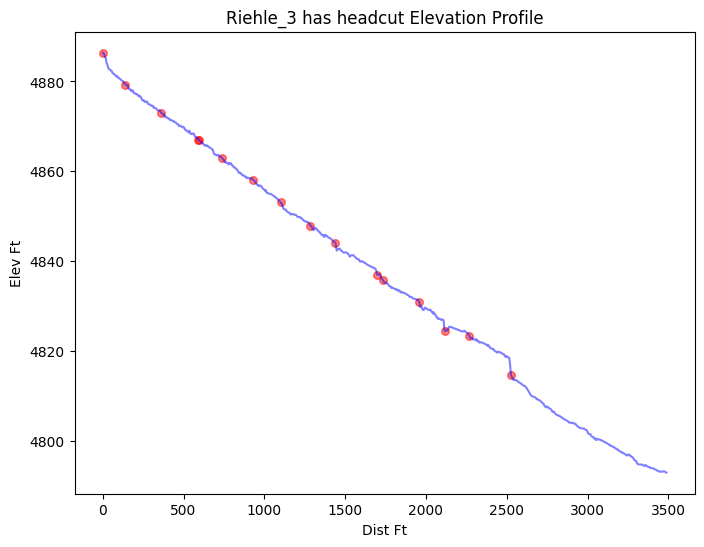

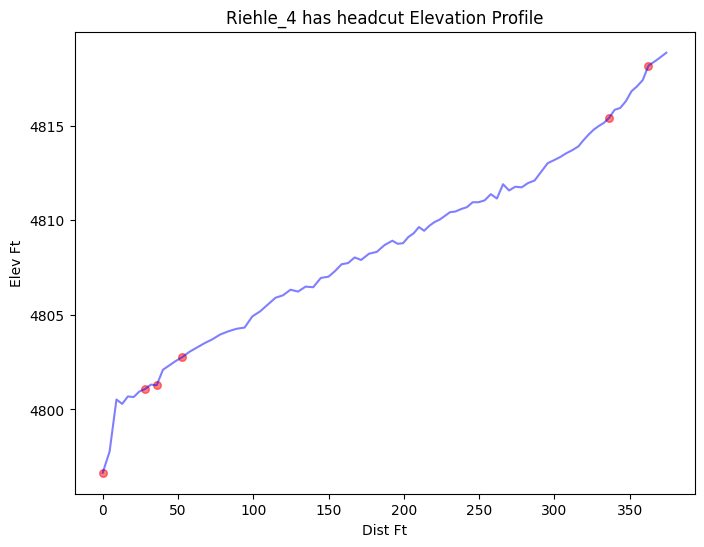

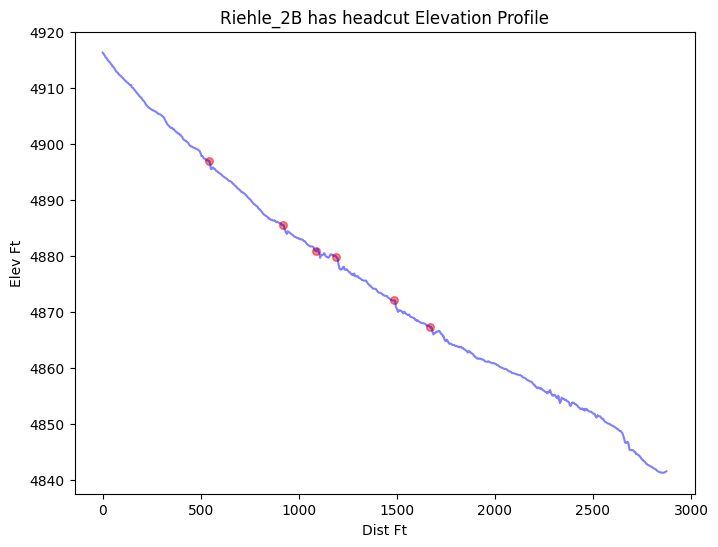

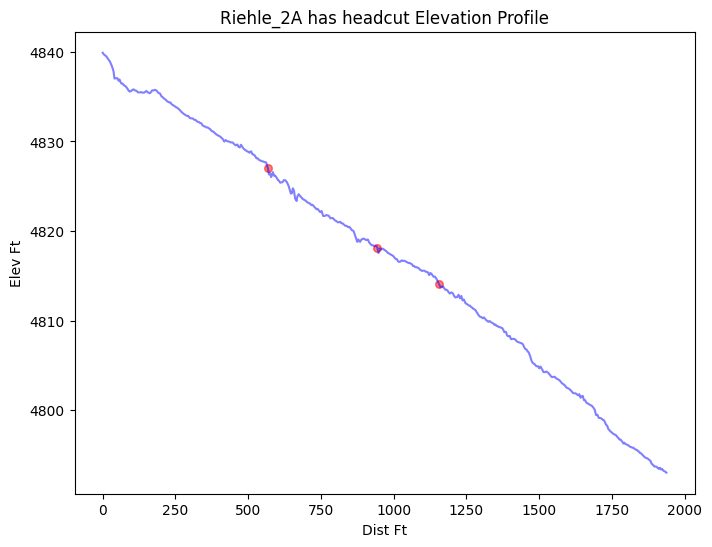

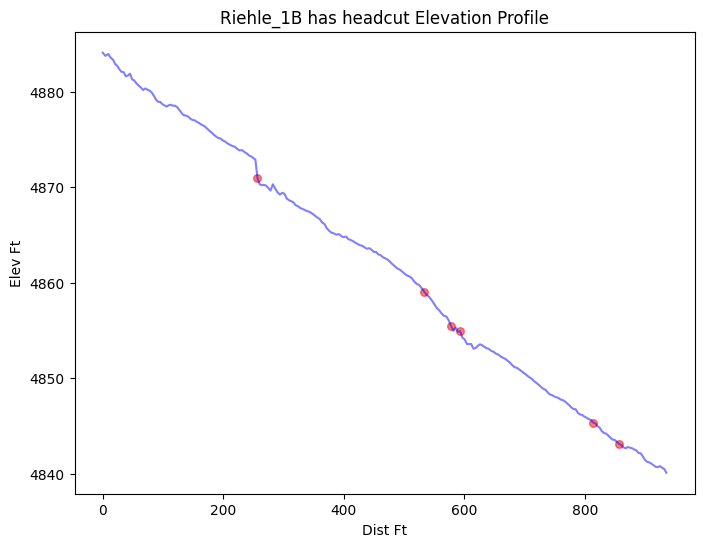

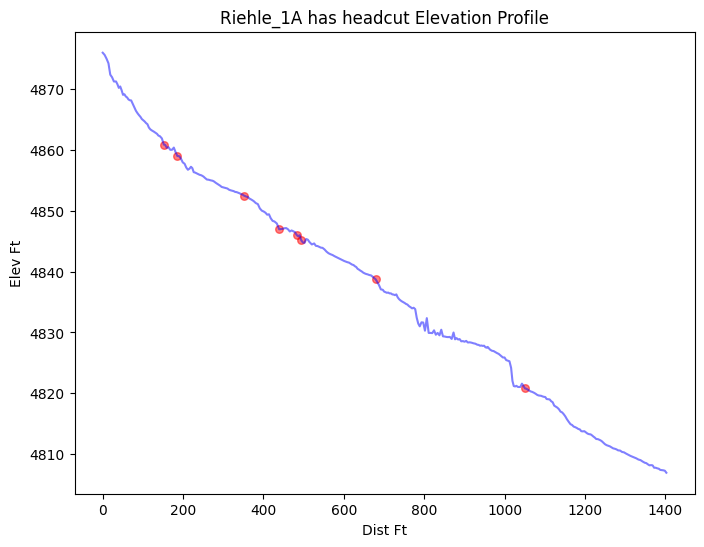

In [25]:
profiles = stream_df_new.stream_profiles.keys()

for profile in profiles:
    viz = Visualize_Profile()
    stream_df = stream_df_new.stream_profiles[profile]
    viz.plot_elev_profile(stream_df, profile, True)

Now let's add a column to our stream profile called `has_headcut`. This will be our dependent variable for our machine learning model.

## Building a Data Analysis Object

Now that we have some data visualization tools built out, let's create an object to let us do some data analysis and possibly make some predictions about locations of potential headcuts. A good place to start might be to look at the zoomed in headcut sections that we created the visulizer for, and look at slope changes, and elevation changes within these ranges.

The data analysis object will take in a stream profile dataframe, and then there will be methods to predict headcuts based on elevation change, slope change and possible other factors. This will serve as an estimate of potential headcut locations. We may go further and create a machine learning approach to predict headcuts in a later section but let's begin with simpler data analysis to see if we can predict headcut locations

In [26]:
class Headcut_Predictor:
    
    def elev_change_prediction(self, stream_path_df: pd.DataFrame, max_allowable_deviation: int = 0.5) -> pd.DataFrame:
        """
        This functions takes in a stream profile dataframe and predicts locations of headcuts based on the deviation from average
        
        Args: 
            stream_profile_dataframe (pd.DataFrame): The dataframe containing the stream profile and associated data
            min_allowable_deviation (int): Min allowable deviation from average
        Returns:
            potential_headcuts_df (pd.DataFrame): Dataframe containing rows that excede min_allowable_deviation
        """
        
#         potential_headcut_indices = stream_p_df.index[abs(stream_path_df['Dev From Avg']) >= 0.5].tolist()
        
        for i in range(len(stream_path_df)):
            greater_than_dev = False
            if stream_path_df['Dev From Avg'].iloc[i] > max_allowable_deviation:
                greater_than_dev = True 
                
            stream_path_df.at[i, 'Exceeds Dev'] = 1 if greater_than_dev else 0
            
        return stream_path_df
    
    def slope_change_prediction(self, stream_path_df: pd.DataFrame, slope_gap_title: str= 'Slope Gap: 1',max_allowable_deviation: int=0.5) -> pd.DataFrame:
        """
        This functions takes in a stream profile dataframe and predicts locations of headcuts based on the deviation from average
        
        Args: 
            stream_profile_dataframe (pd.DataFrame): The dataframe containing the stream profile and associated data
            min_allowable_deviation (int): Min allowable deviation from average
        Returns:
            potential_headcuts_df (pd.DataFrame): Dataframe containing rows that excede min_allowable_deviation
        """
        stream_length = len(stream_path_df)
        slope_change_arr = []
        for i in range(stream_length-1):
            slope_change = stream_path_df[slope_gap_title].iloc[i+1] - stream_path_df[slope_gap_title].iloc[i]
            slope_change_arr.append(slope_change)
        slope_change_arr.append(slope_change)    
        avg_slope_change = sum(slope_change_arr)/float(len(slope_change_arr))
        
        for i in range(stream_length-1):
            greater_than_dev = False
            if slope_change_arr[i] > max_allowable_deviation:
                greater_than_dev = True 
                
            stream_path_df.at[i, 'Exceeds Slope Dev'] = 1 if greater_than_dev else 0
            
        return stream_path_df
        
        
    
    def filter_bools(self, stream_path_df: pd.DataFrame, bool_col: str = 'has headcut') -> pd.DataFrame:
        """
        This functions takes in a stream profile dataframe and outputs a list of potential headcut locations
        
        Args: 
            stream_profile_dataframe (pd.DataFrame): The dataframe containing the stream profile and associated data
            bool_col (str): The column by which the headcut location outputs are filtered
        Returns:
            avg_dev_headcuts_df (pd.DataFrame): Dataframe containing rows that have a 1 in the bool column
        """
        
        filtered_df = stream_path_df.loc[stream_path_df[bool_col] == 1]
        
        return filtered_df
    
        

In [27]:
# Create an instance of the Headcut_Predictor class
headcut_predictor = Headcut_Predictor()

# Access the docstring of the elev_change_prediction function
description = headcut_predictor.elev_change_prediction.__doc__

print(description)


        This functions takes in a stream profile dataframe and predicts locations of headcuts based on the deviation from average
        
        Args: 
            stream_profile_dataframe (pd.DataFrame): The dataframe containing the stream profile and associated data
            min_allowable_deviation (int): Min allowable deviation from average
        Returns:
            potential_headcuts_df (pd.DataFrame): Dataframe containing rows that excede min_allowable_deviation
        


20


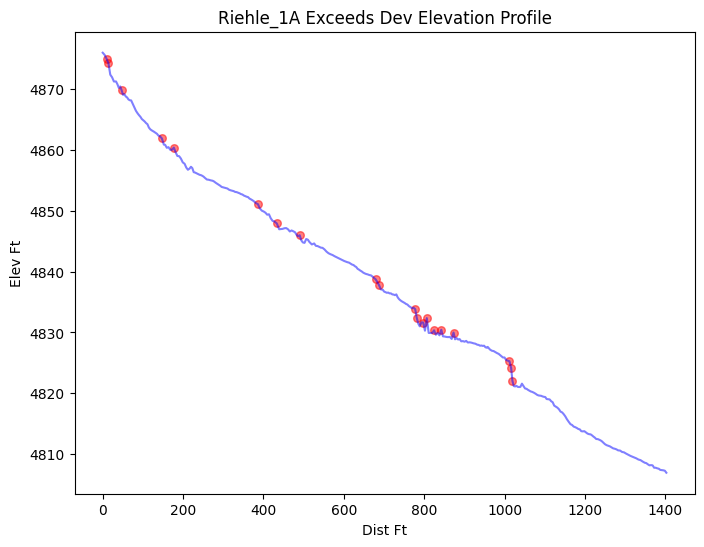

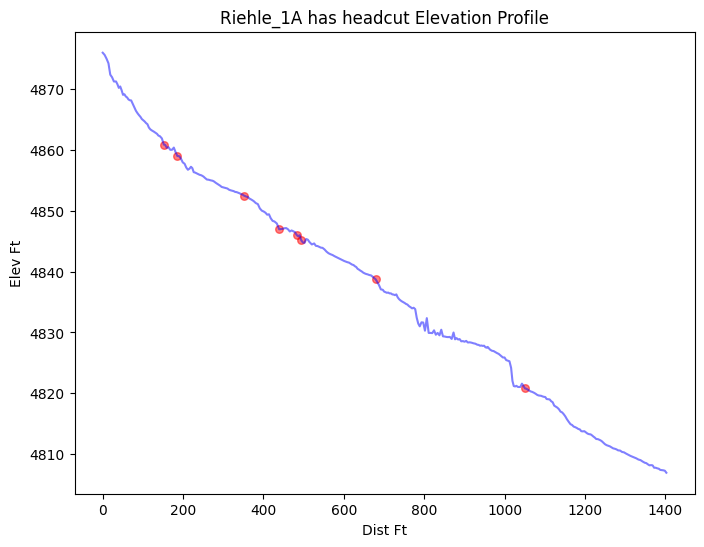

,Dist M,X,Y,Elev Ft,has headcut,Dist Ft,Slope Gap: 1,Slope Gap: 5,Slope Gap: 10,Slope Gap: 15,Sinuosity Gap: 50,Sinuosity Gap: 100,Sinuosity Gap: 150,Dev From Avg,Exceeds Slope Dev,Exceeds Dev
4,5.737663,496113.3886,4794179.843,4872.342773,0.0,18.824353,-0.835834,-0.472151,-0.410750,-0.368343,1.036281,1.101450,1.167422,0.224647,1.0,0.0
8,11.168675,496112.1859,4794174.641,4870.768066,0.0,36.642634,-0.495301,-0.420237,-0.363057,-0.372453,1.034154,1.118669,1.163015,0.388222,1.0,0.0
11,14.346493,496111.8250,4794171.484,4869.783691,0.0,47.068546,-0.650413,-0.267005,-0.386539,-0.360864,1.036853,1.125729,1.159931,0.552772,1.0,1.0
52,63.377220,496119.6430,4794123.914,4857.086426,0.0,207.930510,-0.389285,-0.214539,-0.181806,-0.183054,1.088337,1.169209,1.137246,0.158730,1.0,0.0
119,150.577461,496097.3317,4794057.521,4845.144531,1.0,494.020543,-0.487537,-0.144413,-0.115540,-0.125338,1.115506,1.136529,1.109933,0.159218,1.0,0.0
120,151.828456,496096.6461,4794056.475,4844.783203,0.0,498.124855,-0.170372,-0.157108,-0.122250,-0.126584,1.114180,1.136525,1.109572,-0.137169,1.0,0.0
189,238.183912,496066.5408,4793983.130,4832.415039,0.0,781.443281,-1.032285,-0.333048,-0.194776,-0.185723,1.042005,1.087311,1.107513,0.749550,1.0,1.0
190,239.328123,496066.6009,4793981.987,4831.463379,0.0,785.197254,-0.616640,-0.146121,-0.216313,-0.189042,1.041513,1.088414,1.106777,0.257363,1.0,0.0
193,243.110210,496065.5786,4793978.439,4831.627441,0.0,797.605677,-0.522363,-0.304467,-0.161005,-0.160353,1.039518,1.091548,1.106316,1.143104,1.0,1.0
196,247.253093,496063.7744,4793974.711,4829.921387,0.0,811.197812,-0.846925,-0.079688,-0.180879,-0.156119,1.039578,1.091381,1.104801,-0.202110,1.0,0.0


In [34]:
dat = Headcut_Predictor()
profile = 'Riehle_1A'
stream_df = stream_df_new.stream_profiles[profile]

stream_df = dat.elev_change_prediction(stream_df ,0.5)
stream_df = dat.slope_change_prediction(stream_df,'Slope Gap: 1' ,0.3)

elev_headcuts_df = stream_df[(stream_df['Exceeds Dev']==1)]
print(len(elev_headcuts_df))

viz.plot_elev_profile(stream_df, profile, True, 'Exceeds Dev')
viz.plot_elev_profile(stream_df, profile, True)

elevation_headcuts_df = dat.filter_bools(stream_df, 'Exceeds Slope Dev')
elevation_headcuts_df

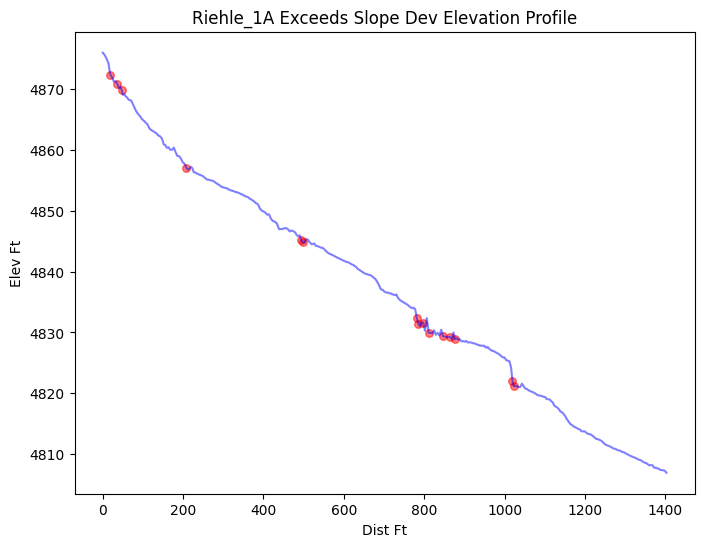

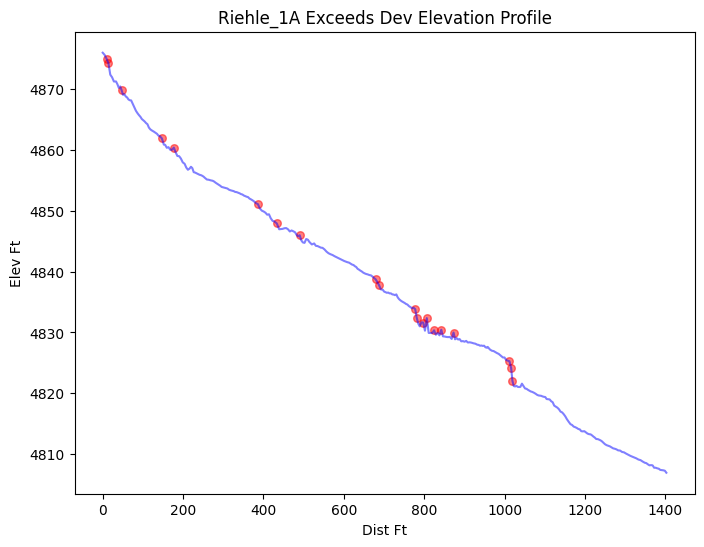

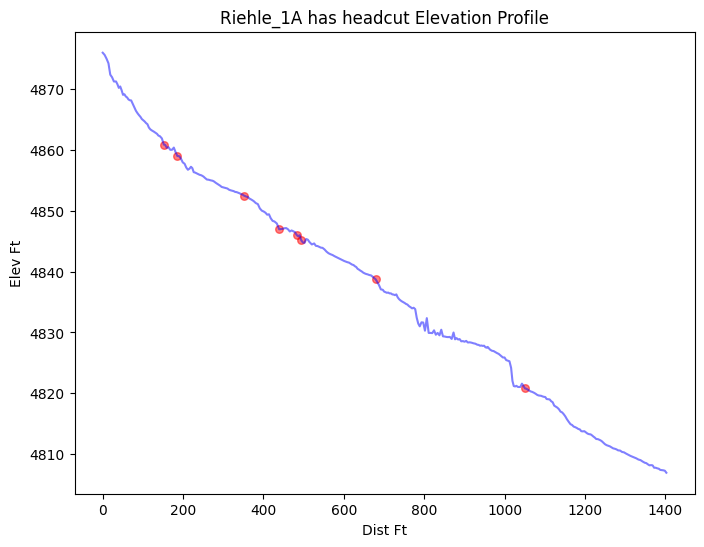

In [38]:
viz.plot_elev_profile(stream_df, profile, True, 'Exceeds Slope Dev')
viz.plot_elev_profile(stream_df, profile, True, 'Exceeds Dev')
viz.plot_elev_profile(stream_df, profile, True)
# viz.plot_zoomed_profiles(stream_df, profile, 'Exceeds Slope Dev')